# Practice Model: A Simple Starter
### Building a GP where  

$
\begin{align}
\Delta \nu \sim \mathcal{GP}(f(mass), k(mass,mass^{\prime}))
\end{align}
$

We'll try out `sklearn` just to see how it goes.

> We are looking for the functional form so that we can implement the likelihood calculation later.  
The independent parameter is mass and the observed is $\Delta$$\nu$

***

Something something let's see what scikit learn does

In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

Let's not forget all the basic imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Let's also make the decision to stick with common syntax, instead of trying to get fancy and call them mass and $\Delta$$\nu$

In [53]:
data = np.loadtxt('./Lindsey_version1.csv', delimiter=',', skiprows=1)
y = data[:,1]
X = data [:, 0]

Now we can try jumping straight in with a GP model; We're following along with the example [here](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py)

In [54]:
x = np.atleast_2d(np.linspace((np.min(X)-0.1), (np.max(X)+0.1), 1000)).T

kernel = RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

Now that there's a model, we can try to fit it and see what happens:

/Users/admin/Library/Python/3.7/lib/python/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/admin/Library/Python/3.7/lib/python/site-packages/sklearn/gaussian_process/_gpr.py:362: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


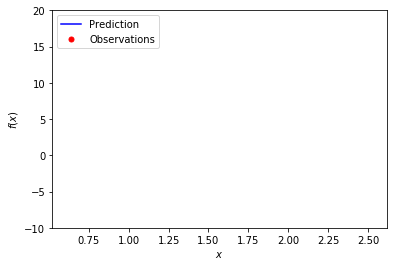

In [55]:
# Fit to data using Maximum Likelihood Estimation of the parameters
X = np.atleast_2d(X).T
y = np.atleast_2d(y).T
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.errorbar(X.ravel(), y, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')